In [1]:
# -*- coding: utf-8 -*-
import sys
import numpy as np
from thirdparty.spectrum_instruments.pyspcm import *
import matplotlib.pyplot as plt

In [2]:
sys.path.append(r'‪C:\Users\Andrew\Desktop')

In [3]:
import awg_debug

In [4]:
awg = awg_debug.AWGDebugClass()

In [5]:
awg.on_activate()

In [31]:
frequency = list(np.arange(1e6, 101e6, 1e6))
amplitude = 4.0
llMemSamples=1024*256
sample_rate=1.25e9
loop=100
awg.set_list(frequency=frequency, amplitude=amplitude, llMemSamples=llMemSamples, sample_rate=sample_rate, loop=loop)
awg.restart()

Uploaded segment 1 of 100.
Uploaded segment 2 of 100.
Uploaded segment 3 of 100.
Uploaded segment 4 of 100.
Uploaded segment 5 of 100.
Uploaded segment 6 of 100.
Uploaded segment 7 of 100.
Uploaded segment 8 of 100.
Uploaded segment 9 of 100.
Uploaded segment 10 of 100.
Uploaded segment 11 of 100.
Uploaded segment 12 of 100.
Uploaded segment 13 of 100.
Uploaded segment 14 of 100.
Uploaded segment 15 of 100.
Uploaded segment 16 of 100.
Uploaded segment 17 of 100.
Uploaded segment 18 of 100.
Uploaded segment 19 of 100.
Uploaded segment 20 of 100.
Uploaded segment 21 of 100.
Uploaded segment 22 of 100.
Uploaded segment 23 of 100.
Uploaded segment 24 of 100.
Uploaded segment 25 of 100.
Uploaded segment 26 of 100.
Uploaded segment 27 of 100.
Uploaded segment 28 of 100.
Uploaded segment 29 of 100.
Uploaded segment 30 of 100.
Uploaded segment 31 of 100.
Uploaded segment 32 of 100.
Uploaded segment 33 of 100.
Uploaded segment 34 of 100.
Uploaded segment 35 of 100.
Uploaded segment 36 of 100.
U

0

In [33]:
awg.restart()

0

In [ ]:
awg.pulser_off()

In [26]:
awg._spcm_dwSetParam_i32(SPC_M2CMD, M2CMD_CARD_RESET)

0

In [ ]:
#awg.force_trigger()

In [ ]:
#awg.read_out_error()

In [ ]:
#awg.pulser_on()

In [ ]:
print(awg._spcm_dwGetParam_i32(SPC_M2STATUS))
print('{:08x}'.format(awg._spcm_dwGetParam_i32(SPC_CARDMODE)))

In [35]:
spcm_dwSetParam_i32(awg._hCard, SPC_MEMTEST, 1)
print(awg._spcm_dwGetParam_i32(SPC_M2STATUS))
# just 384 zeros for the timetagger
llMemSample = (1024*256*50+50*384)*50
qwBufferSize = uint64(llMemSample * 2 * 1)
pvBuffer     = create_string_buffer(qwBufferSize.value)
# calculate the data
read_out_buffer = cast(pvBuffer, ptr16)

# it is assumed, that the Buffer memory has been allocated and is already filled with valid data
spcm_dwDefTransfer_i64(awg._hCard, SPCM_BUF_DATA, SPCM_DIR_CARDTOPC, 0, read_out_buffer, 0, qwBufferSize)
spcm_dwSetParam_i32(awg._hCard, SPC_M2CMD, M2CMD_DATA_STARTDMA | M2CMD_DATA_WAITDMA)
spcm_dwSetParam_i32(awg._hCard, SPC_MEMTEST, 0)
print(awg.read_out_error())

7
0


In [36]:
a = np.zeros(llMemSample//100)
b = np.zeros(llMemSample//100)
c = np.zeros(llMemSample//100)
d = np.zeros(llMemSample//100)
for i in range(llMemSample//100):
    item = np.uint16(read_out_buffer[i*100])
    a[i] = (item & 0x8000) >> 15
    b[i] = (item & 0x4000)>> 14
    d[i] = np.int16((item & 0x3fff) << 2)/2**15
    c[i] = read_out_buffer[i]/2**15

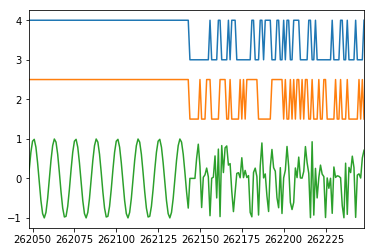

In [61]:
plt.plot(a+3)
plt.plot(b+1.5)
#plt.plot(c)
plt.plot(d)
plt.xlim((256*1024*100+384)*1/100-100, (256*1024*100+384)*1/100+100)
plt.show()

In [51]:
t = np.arange(llMemSamples)/sample_rate
a_ch1_signal = np.concatenate((np.sin(t * (frequency[0]) * 2*np.pi), np.zeros(384), np.sin(t * (frequency[1]) * 2*np.pi)))
d_ch1_signal = np.concatenate((np.full(llMemSamples, 1), np.full(384, 0), np.full(llMemSamples, 1)))
d_ch2_signal = np.concatenate((np.full(llMemSamples, 1), np.full(384, 0), np.full(llMemSamples, 0)))

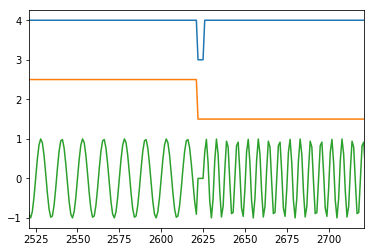

In [55]:
plt.plot(d_ch1_signal[::100]+3)
plt.plot(d_ch2_signal[::100]+1.5)
plt.plot(a_ch1_signal[::100])
plt.xlim((256*1024)//100-100, (256*1024)//100+100)
plt.show()